[模型代码指路](https://github.com/TGMax233Michael/MyMLModule/blob/main/myMLModule/models/linear_model.py)

In [32]:
from myMLModule.models.linear_model import LinearRegression
from myMLModule.model_selection import train_test_split
from myMLModule.preprocessing.feature import polynomial_feature
from myMLModule.preprocessing.scaler import min_max_scaler
from myMLModule.metrics.regression import MeanSqaureError, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

对波士顿房价各自变量与房价之间的相对关系进行分析

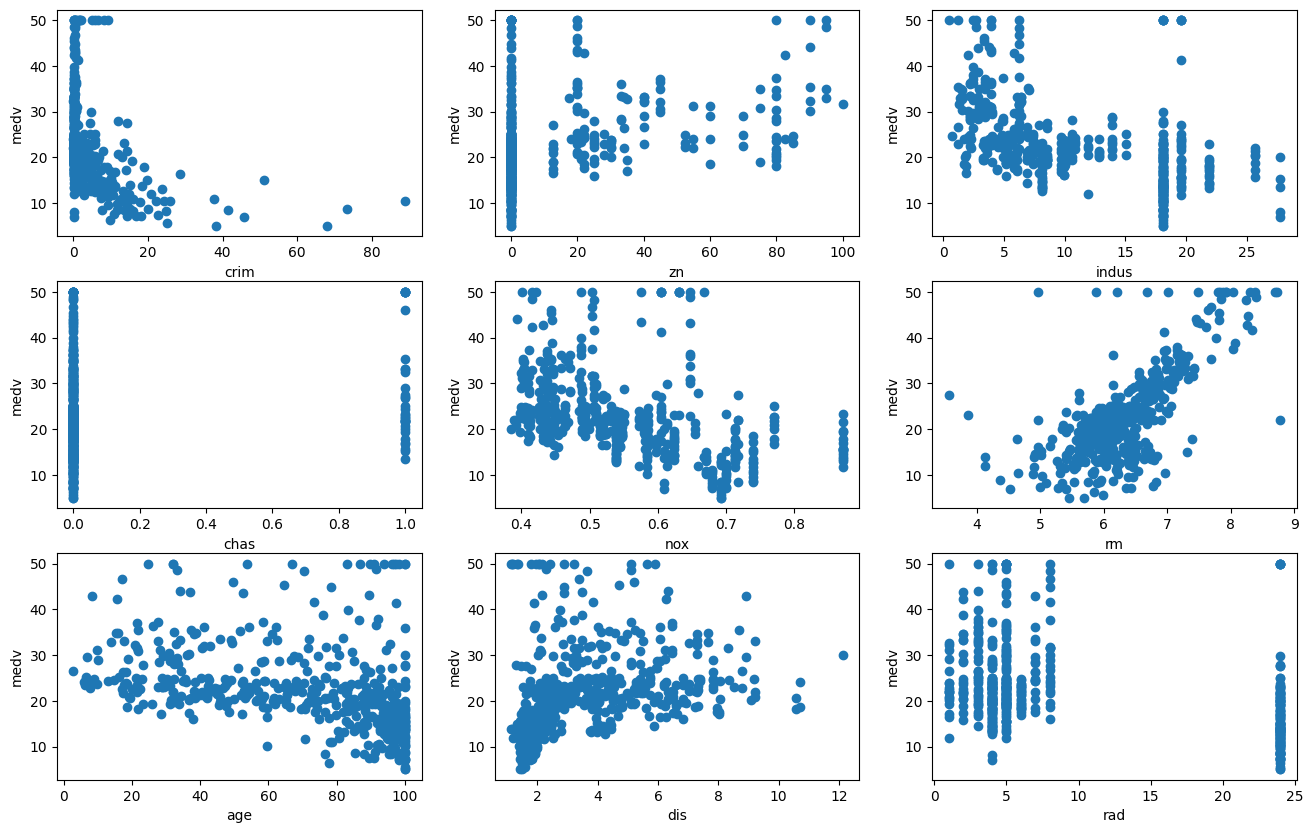

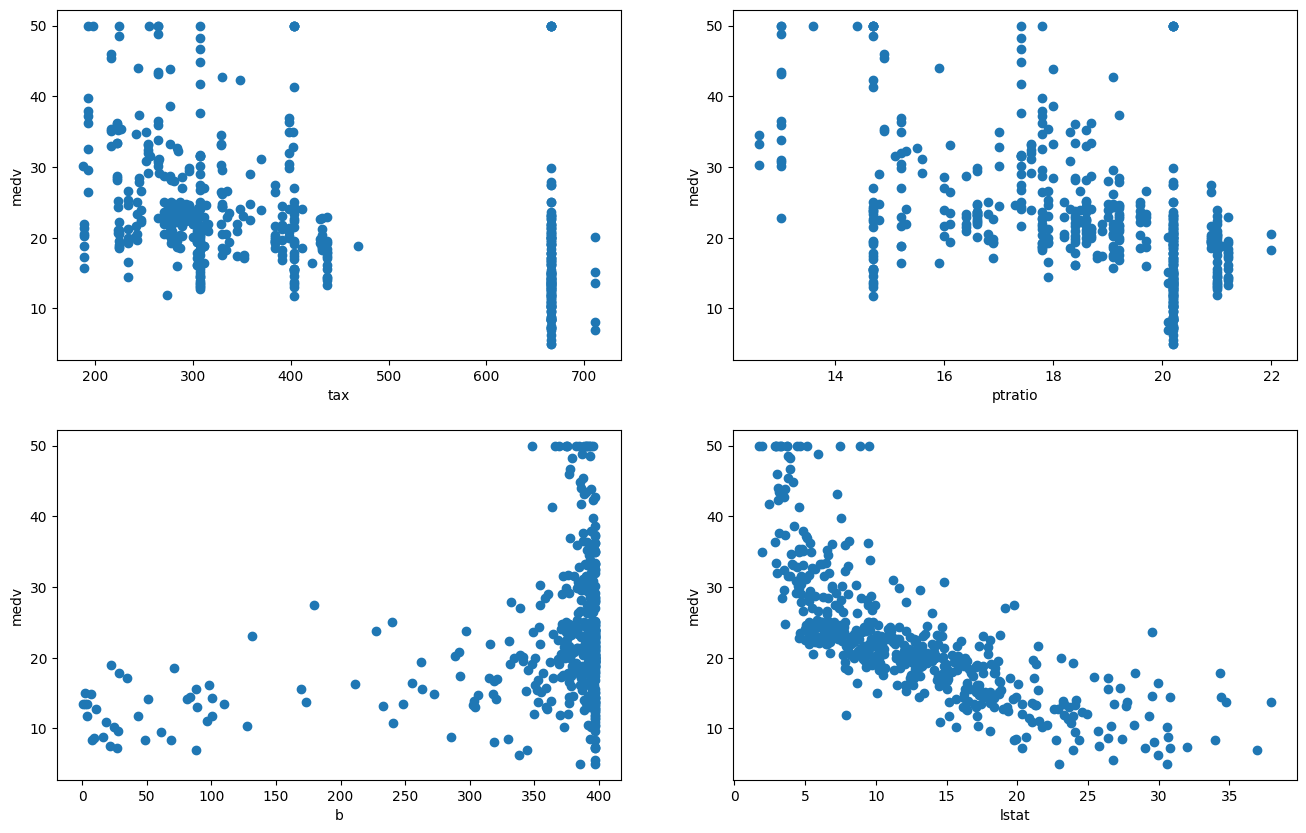

In [33]:
def show_relevance(X: pd.DataFrame, y: pd.DataFrame):
    plt.figure(figsize=(16, 10), dpi=100)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.scatter(X.iloc[:, i], y)
        plt.xlabel(f"{X.columns[i]}")
        plt.ylabel(f"{y.name}")
        
    plt.figure(figsize=(16, 10), dpi=100)
    for i in range(9, 13):
        plt.subplot(2, 2, i-8)
        plt.scatter(X.iloc[:, i], y)
        plt.xlabel(f"{X.columns[i]}")
        plt.ylabel(f"{y.name}")
    plt.show()

data = pd.read_csv("../波士顿房价预测/BostonHousing.csv")
data = data.dropna(axis=0)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
show_relevance(X, y)

可见 indus ,chas, rad, tax, b这几个特征与房价的关系不明显，故舍弃这些特征

我们还发现，不同特征的数据范围有较大差异，例如nox的范围位于[0.4, 1]之间，rm属于[3, 9]，age属于[0, 100]
这些特征的范围差距较大，会降低模型梯度下降的速度，故使用归一化使得所有特征的取值范围在相同的范围内

In [34]:
print(f"所有特征: {list(X.columns)}")
X = X.drop(columns=['indus' ,'chas', 'rad', 'tax', 'b'])
print(f"保留特征: {list(X.columns)}")

X, y = np.array(X), np.array(y)
X = min_max_scaler(X)
print(X)

所有特征: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
保留特征: ['crim', 'zn', 'nox', 'rm', 'age', 'dis', 'ptratio', 'lstat']
[[0.00000000e+00 1.80000000e-01 3.14814815e-01 ... 2.69203139e-01
  2.87234043e-01 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 1.72839506e-01 ... 3.48961980e-01
  5.53191489e-01 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 1.72839506e-01 ... 3.48961980e-01
  5.53191489e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 3.86831276e-01 ... 9.43811438e-02
  8.93617021e-01 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 3.86831276e-01 ... 1.14514090e-01
  8.93617021e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 3.86831276e-01 ... 1.25071611e-01
  8.93617021e-01 1.69701987e-01]]


由上图我们还可以看出，特征与标签的关系不是单纯的线性关系，而更多的是非线性关系
因此我们对数据进行高阶处理，由实验得出，当最高阶数为5的时候，模型拟合程度较好(即使仍为欠拟合)

最小二乘法求解时不使用升阶，似乎会导致矩阵条件数过高使得测试集r2接近0 (我也不知道为什么，好像是写的升阶处理没有添加交叉相乘的项)

梯度下降时使用升阶，阶数为5

In [35]:
print(polynomial_feature(X, degrees=5))

[[0.00000000e+00 1.80000000e-01 3.14814815e-01 ... 7.21249485e-04
  6.46815901e-05 5.80063929e-06]
 [2.35922539e-04 0.00000000e+00 1.72839506e-01 ... 8.54850277e-03
  1.74791406e-03 3.57396335e-04]
 [2.35697744e-04 0.00000000e+00 1.72839506e-01 ... 2.55634192e-04
  1.62240243e-05 1.02967042e-06]
 ...
 [6.11892474e-04 0.00000000e+00 3.86831276e-01 ... 1.25593078e-03
  1.35504673e-04 1.46198475e-05]
 [1.16072990e-03 0.00000000e+00 3.86831276e-01 ... 2.25172973e-03
  2.95135657e-04 3.86836195e-05]
 [4.61841693e-04 0.00000000e+00 3.86831276e-01 ... 4.88720752e-03
  8.29368826e-04 1.40745537e-04]]


将数据集划分为训练集与测试集，然后用训练集数据训练模型，用测试集检查模型的泛化能力

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
model = LinearRegression(solver="normal_equation")
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
print("线性回归模型")
print("1. 最小二乘法")
print(f"训练集")
print(f"MSE: {MeanSqaureError(y_train, y_train_pred)}")
print(f"R2: {r2_score(y_train, y_train_pred)}")
    
print(f"测试集")
print(f"MSE: {MeanSqaureError(y_test, y_test_pred)}")
print(f"R2: {r2_score(y_test, y_test_pred)}")

print()

X = polynomial_feature(X, degrees=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression(solver="gradient_descent" ,n_epoches=6000, learning_rate=0.05, batch_size=len(X)//2)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("2. 梯度下降")
print(f"训练集")
print(f"MSE: {MeanSqaureError(y_train, y_train_pred)}")
print(f"R2: {r2_score(y_train, y_train_pred)}")
    
print(f"测试集")
print(f"MSE: {MeanSqaureError(y_test, y_test_pred)}")
print(f"R2: {r2_score(y_test, y_test_pred)}")

线性回归模型
1. 最小二乘法
训练集
MSE: 24.93802503075048
R2: 0.713663485374436
测试集
MSE: 21.684614377696136
R2: 0.7094231821269911

2. 梯度下降
训练集
MSE: 20.755637966129818
R2: 0.7616853368811944
测试集
MSE: 13.87336095116878
R2: 0.8140950533784598


梯度下降时MSE随着迭代次数的变化

因为启用了小批量梯度下降，MSE在迭代过程中会有波动，但是最终会收敛，并且模型训练速度相较于批量梯度下降训练会快一些

<img src="./loss_plot.png">